In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [110]:
#directory_path = '/Users/mahtablashgari/Desktop/Portfolio2024/Protfolio2024/Dataset'
directory_path ='/Users/mahtablashgari/Desktop/Portfolio2024_v2/Dataset'
files_and_dirs = os.listdir(directory_path)
files_and_dirs

['.DS_Store', 'Data_original', 'Data_kaggle']

In [111]:
def show_img(img):
    img= mpimg.imread(img_dir+img)
    imgplot=plt.imshow(img)
    plt.show()

In [53]:
cd 'Dataset/Data_original/dataverse_files'

[Errno 2] No such file or directory: 'Dataset/Data_original/dataverse_files'
/Users/mahtablashgari/Desktop/Portfolio2024_v2/Dataset/Data_original/dataverse_files


In [112]:
ls

HAM10000_images/
HAM10000_images_part_1.zip
HAM10000_images_part_2/
HAM10000_images_part_2.zip
HAM10000_metadata.csv
HAM10000_segmentations_lesion_tschandl.zip
ISIC2018_Task3_Test_GroundTruth.csv
ISIC2018_Task3_Test_Images.zip
ISIC2018_Task3_Test_NatureMedicine_AI_Interaction_Benefit.csv


In [113]:
df= pd.read_csv('HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [114]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


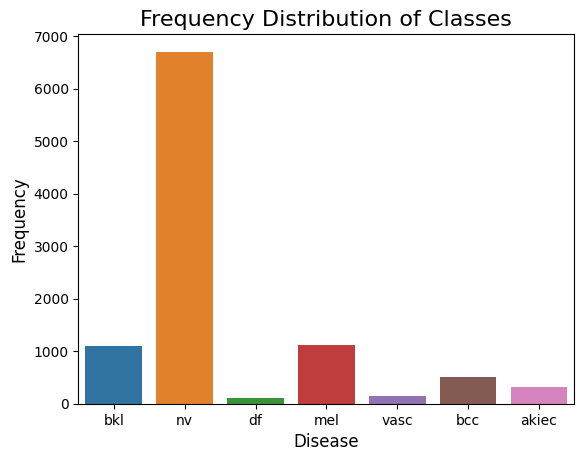

In [115]:
# frequency distribution of different classes (diseases)
sns.countplot(x='dx', data=df)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

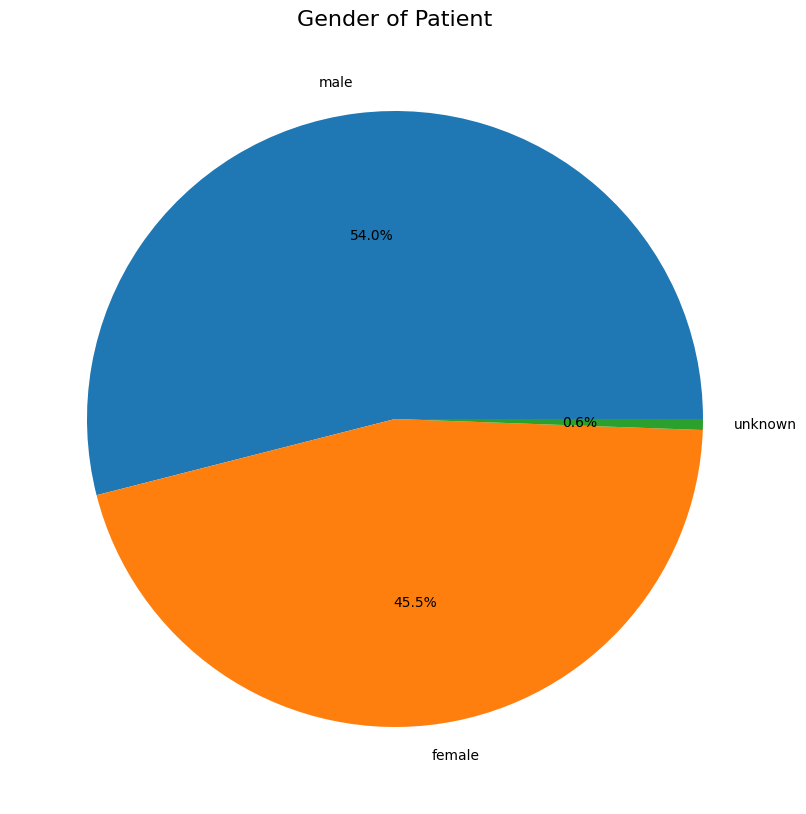

In [116]:
#A pie chart visualizes the gender distribution of patients
bar, ax = plt.subplots(figsize=(10, 10))
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)
plt.show()

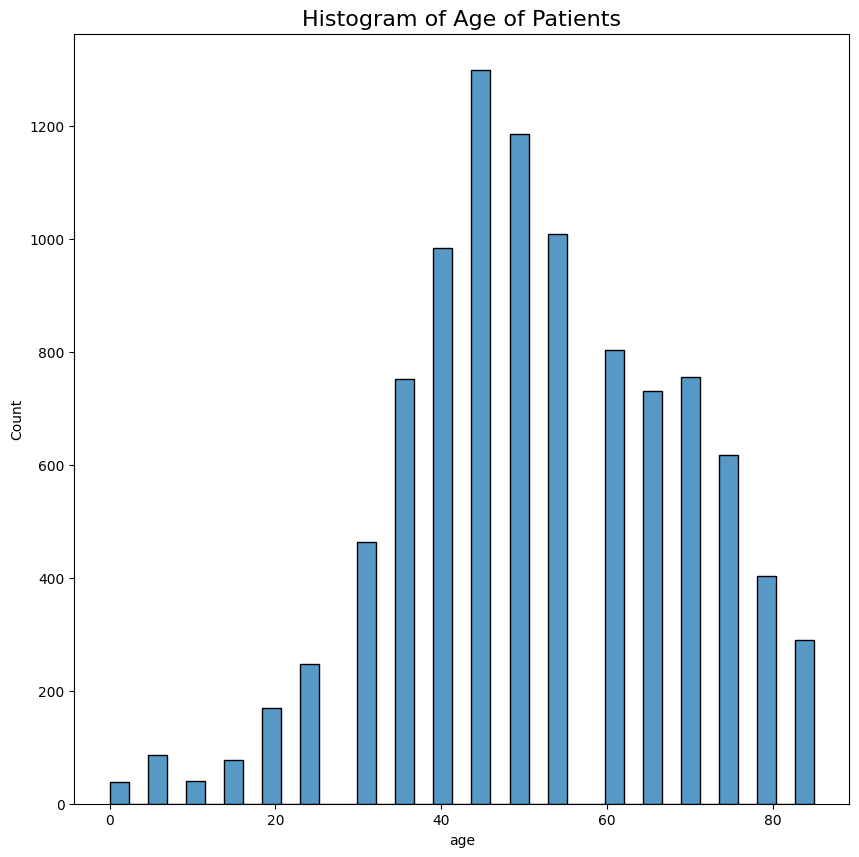

In [59]:
bar, ax = plt.subplots(figsize=(10, 10))
sns.histplot(df['age'])
plt.title('Histogram of Age of Patients', size=16)
plt.show()

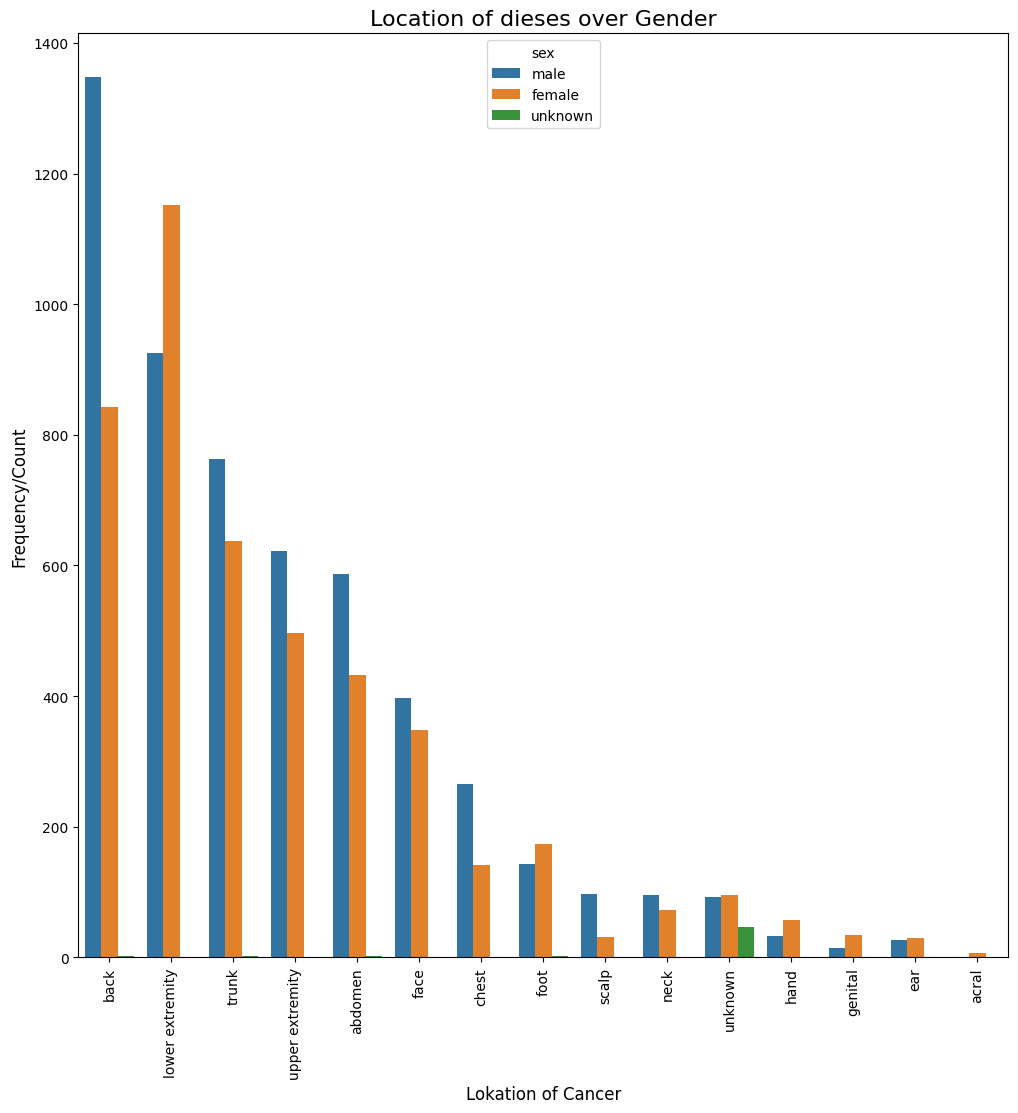

In [117]:
#A bar plot shows the distribution of disease locations across genders
value = df[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'localization': 'location', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='location', y='count', hue='sex', data=temp)
plt.title('Location of dieses over Gender', size=16)
plt.xlabel('Lokation of Cancer', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation=90)
plt.show()

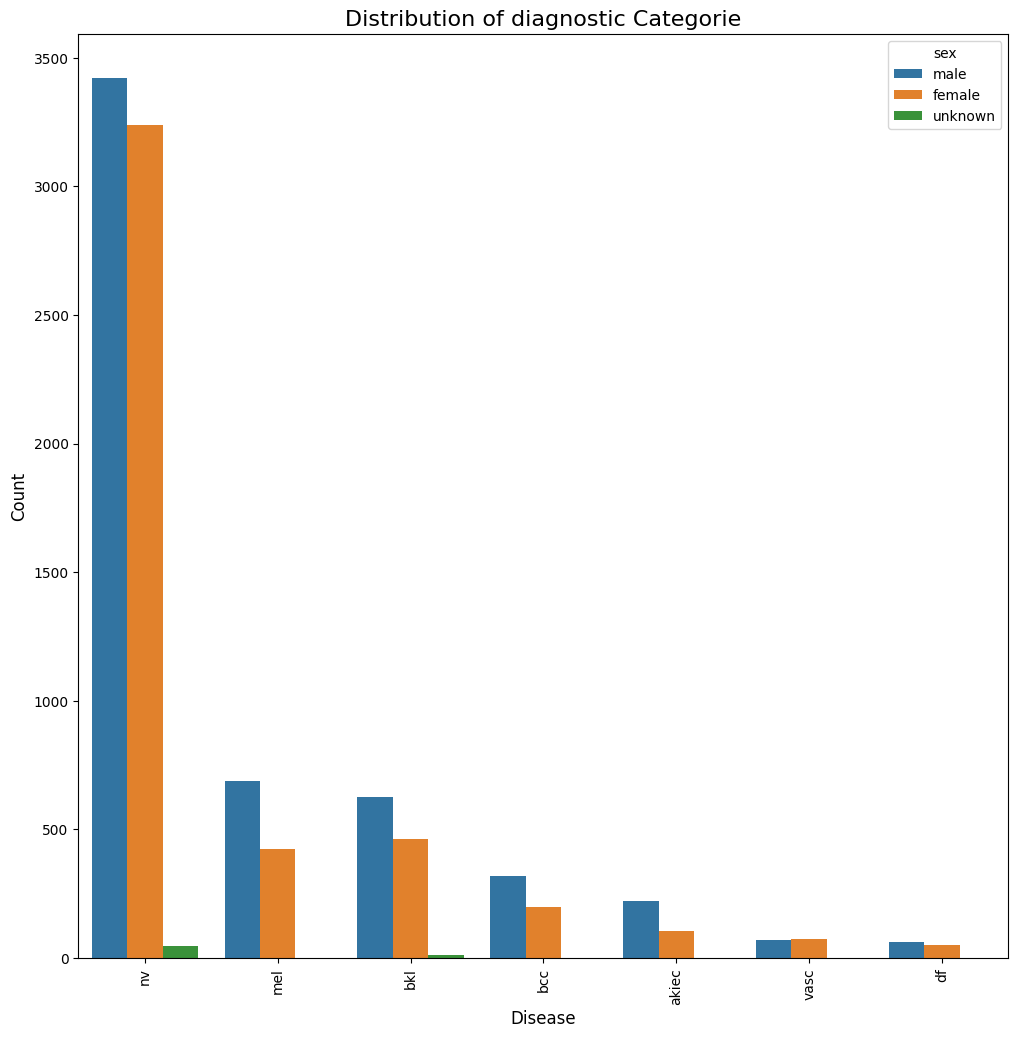

In [118]:
value = df[['dx', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'dx': 'dx', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='dx', y='count', hue='sex', data=temp)
plt.title('Distribution of diagnostic Categorie', size=16)
plt.xlabel('Disease', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=90)
plt.show()

In [119]:
counts = pd.DataFrame(df['dx'].value_counts()).reset_index()
counts

,dx,count
0,nv,6705
1,mel,1113
2,bkl,1099
3,bcc,514
4,akiec,327
5,vasc,142
6,df,115


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


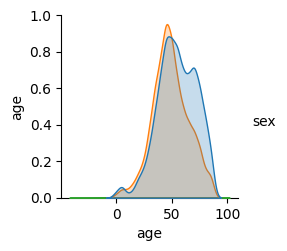

In [120]:
sns.pairplot(df, hue='sex')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


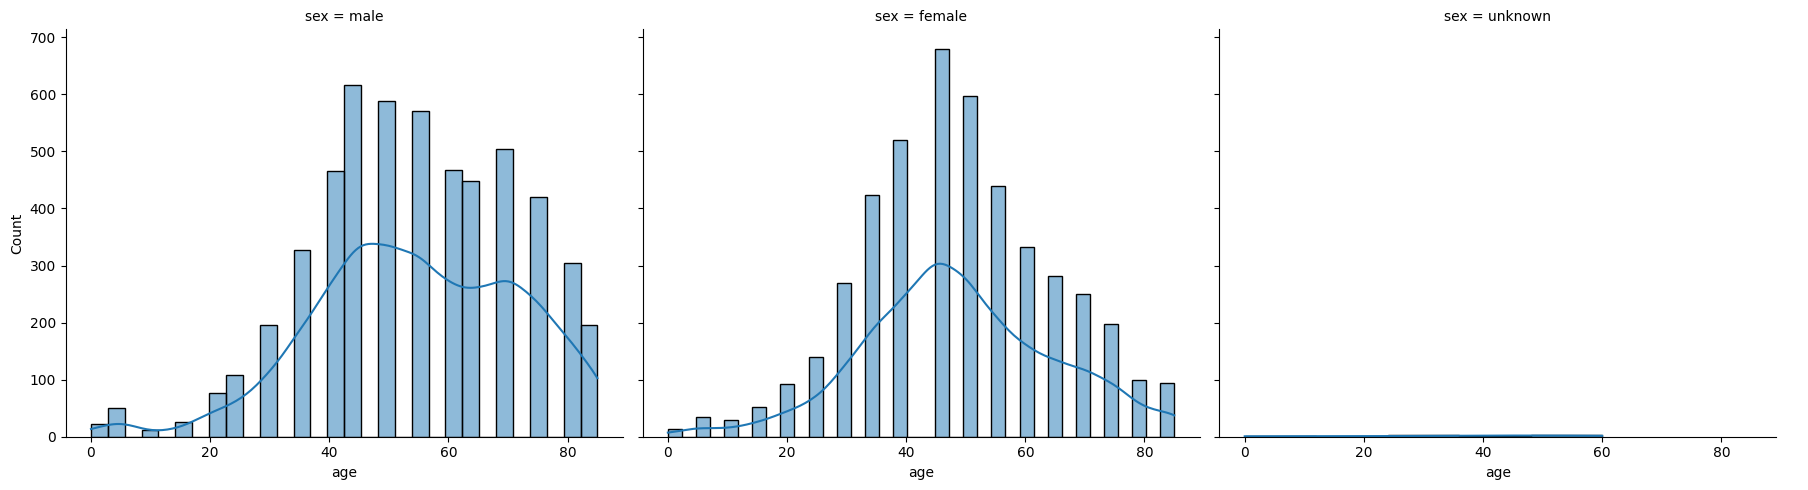

In [121]:
g = sns.FacetGrid(df, col='sex', height=5, aspect=1.2)
g.map(sns.histplot, 'age', kde=True)
g.add_legend()
plt.show()

In [122]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB
None


In [123]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


age    57
dtype: int64


In [124]:
df_cleaned = df.dropna()

In [125]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [126]:
dx_dict = {'bkl':0, 'df':0, 'nv':0, 'vasc':0, 'akiec':1, 'bcc':1, 'mel':1}

df['Label']= df['dx'].map(dx_dict)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,0
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,1
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,1
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,1
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,1


In [127]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,0


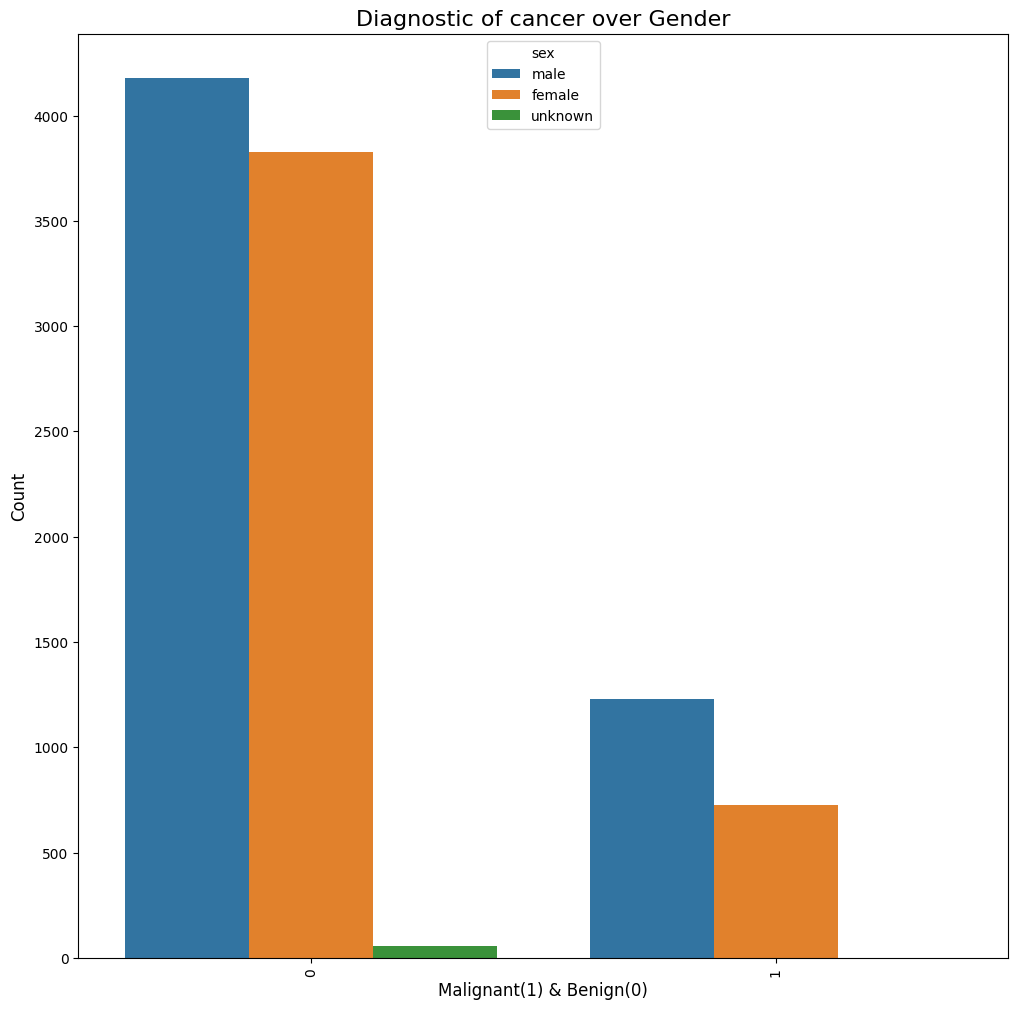

In [128]:
value = df[['Label', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'Label': 'Label', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='Label', y='count', hue='sex', data=temp)
plt.title('Diagnostic of cancer over Gender', size=16)
plt.xlabel('Malignant(1) & Benign(0)', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=90)
plt.show()

In [129]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,0


In [130]:
df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset', 'Label'],
      dtype='object')

Oversampling

In [131]:
from imblearn.over_sampling import RandomOverSampler 


In [142]:
y = df['Label']
x = df.drop(columns = ['Label'])


In [143]:
oversample = RandomOverSampler()
x_resampled, y_resampled = oversample.fit_resample(x, y)

In [144]:
y.shape

(10015,)

In [145]:
x.shape

(10015, 8)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
 8   Label         10015 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 704.3+ KB


In [147]:
x['age'].fillna(x['age'].mean(), inplace=True)

Kodierung kategorialer Daten

In [148]:
x = x.drop(columns=['lesion_id', 'image_id'])


In [149]:
x = pd.get_dummies(x, columns=['dx', 'dx_type', 'sex', 'localization', 'dataset'], drop_first=True)

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [151]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [152]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train, y_train)


RandomForest

In [153]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [154]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

# Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00       388

    accuracy                           1.00      2003
   macro avg       1.00      1.00      1.00      2003
weighted avg       1.00      1.00      1.00      2003



In [155]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_scaled, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')


Cross-Validation Scores: [0.54218672 1.         1.         1.         0.83674488]
Mean Accuracy: 0.8757863205192212


In [159]:
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

roc_auc = make_scorer(roc_auc_score, multi_class='ovr')

roc_auc_scores = cross_val_score(model, x_scaled, y, cv=5, scoring=roc_auc)

print("ROC AUC Scores:", roc_auc_scores)
print("Mean ROC AUC Score:", roc_auc_scores.mean())

ROC AUC Scores: [0.71574706 1.         1.         1.         0.58184143]
Mean ROC AUC Score: 0.8595176974803506


In [160]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier


x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

# Training (ohne Oversampling)
model.fit(x_train, y_train)

# Vorhersage für den Testdatensatz
y_pred_proba = model.predict_proba(x_test)[:, 1]  


roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 1.0


In [161]:
roc_auc_scores = cross_val_score(model, x_scaled, y, cv=5, scoring='roc_auc')

print("Cross-Validation ROC AUC Scores:", roc_auc_scores)
print("Mean ROC AUC Score:", roc_auc_scores.mean())


Cross-Validation ROC AUC Scores: [0.98833596 1.         1.         1.         1.        ]
Mean ROC AUC Score: 0.9976671912505763


In [168]:
df['Label'].value_counts()

Label
0    8061
1    1954
Name: count, dtype: int64